<a href="https://colab.research.google.com/github/Ngcebz30/Data-Analytics-Playground/blob/main/Real%20Estate%20Insight%20in%20New%20York%20%F0%9F%97%BD/NYC_Short_Term_Rental_Analysis_Unlocking_Insights_into_the_Big_Apple's_Housing_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install pandas library using pip
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()

Saving NY Realstate Pricing.csv to NY Realstate Pricing.csv


In [4]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('NY Realstate Pricing.csv')


In [5]:
# Explore the data: 

# Check the first few rows of the DataFrame
df.head()


,F1,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


In [6]:
# Check the last few rows of the DataFrame
df.tail()

,F1,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
17609,28313,23691588,Brooklyn,40.69312,-73.94073,Shared room,32,9,31,5,0.26,1
17610,17415,14712466,Brooklyn,40.65446,-73.92613,Shared room,99,7,100,1,0.03,0
17611,27827,23184420,Lower East Side,40.71172,-73.98864,Shared room,41,14,180,2,0.12,365
17612,29127,24555212,Manhattan,40.71113,-73.98840,Shared room,38,0,180,1,0.27,365
17613,25441,21628183,Manhattan,40.71165,-73.98708,Shared room,41,124,180,3,0.13,351


In [7]:
# Check the data types of the columns
df.dtypes


F1                         int64
id                         int64
neighbourhood             object
latitude                 float64
longitude                float64
room_type                 object
price                      int64
days_occupied_in_2019      int64
minimum_nights             int64
number_of_reviews          int64
reviews_per_month        float64
availability_2020          int64
dtype: object

In [8]:
# Check the number of rows and columns in the DataFrame
df.shape


(17614, 12)

In [9]:
# Check for missing values
df.isnull().sum()


F1                       0
id                       0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
days_occupied_in_2019    0
minimum_nights           0
number_of_reviews        0
reviews_per_month        0
availability_2020        0
dtype: int64

In [10]:
# Clean the data: 
# Drop any columns that are not needed
df = df.drop('id', axis=1)


In [11]:
# Drop any rows with missing values
df = df.dropna()


In [12]:
# Convert any columns with incorrect data types
df['days_occupied_in_2019'] = df['days_occupied_in_2019'].astype(int)
df['availability_2020'] = df['availability_2020'].astype(int)


In [13]:
# Analyze the data: 
# Get summary statistics for numerical columns
df.describe()


,F1,latitude,longitude,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
count,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000
mean,18547.564664,40.726755,-73.947732,145.455490,179.517656,7.392926,56.128988,1.607060,154.154763
std,11000.717341,0.056981,0.050213,194.990677,130.202015,19.233869,65.972370,1.635528,138.079651
min,0.000000,40.508680,-74.239860,0.000000,0.000000,1.000000,1.000000,0.010000,0.000000
25%,8192.250000,40.686042,-73.980938,70.000000,35.000000,2.000000,9.000000,0.340000,8.000000
50%,19496.500000,40.720540,-73.953050,109.000000,198.000000,3.000000,33.000000,1.060000,125.000000
75%,28686.750000,40.763127,-73.930682,170.000000,301.000000,5.000000,79.000000,2.460000,309.000000
max,35596.000000,40.908040,-73.721790,9999.000000,364.000000,1125.000000,675.000000,19.250000,365.000000


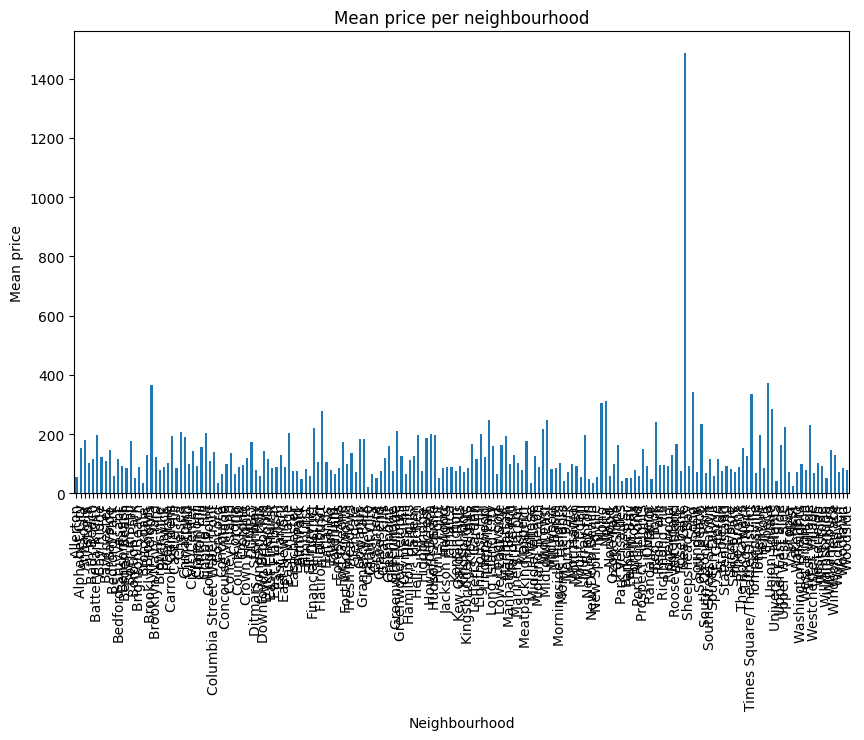

In [14]:
# Calculate the mean price per neighbourhood and plot a bar chart
mean_price = df.groupby('neighbourhood')['price'].mean()
mean_price.plot(kind='bar', figsize=(10, 6))
plt.title('Mean price per neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean price')
plt.show()


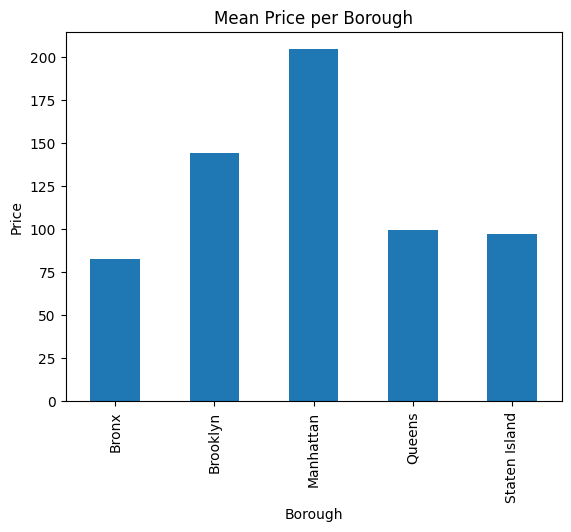

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data from a CSV file
df = pd.read_csv('NY Realstate Pricing.csv')

# remove any rows with missing values
df.dropna(inplace=True)

# create a dictionary to map neighborhoods to boroughs
neighborhoods = {
    'Manhattan': ['Upper West Side', 'Upper East Side', 'Midtown', 'Hell\'s Kitchen', 'East Village', 'Harlem', 'Chelsea', 'West Village', 'Greenwich Village', 'SoHo', 'Lower East Side', 'Washington Heights', 'Inwood', 'Murray Hill', 'Little Italy', 'Chinatown', 'Financial District', 'Nolita', 'Gramercy Park', 'Tribeca', 'Flatiron District', 'Kips Bay'],
    'Brooklyn': ['Williamsburg', 'Bedford-Stuyvesant', 'Bushwick', 'Greenpoint', 'Park Slope', 'Crown Heights', 'Prospect-Lefferts Gardens', 'Clinton Hill', 'Fort Greene', 'Brooklyn Heights', 'Downtown Brooklyn', 'Cobble Hill', 'Carroll Gardens', 'Red Hook', 'Gowanus', 'Prospect Heights', 'East Flatbush', 'East New York', 'Flatbush', 'Sunset Park', 'Borough Park', 'Bay Ridge', 'DUMBO/Vinegar Hill', 'Marine Park', 'Mill Basin', 'Manhattan Beach'],
    'Queens': ['Long Island City', 'Astoria', 'Flushing', 'Jackson Heights', 'Sunnyside', 'Forest Hills', 'Woodside', 'Elmhurst', 'Maspeth', 'Ridgewood', 'Whitestone', 'Douglaston', 'Bayside', 'Fresh Meadows', 'Jamaica Estates', 'Rego Park', 'Springfield Gardens', 'Jamaica Hills', 'Kew Gardens', 'Rockaway Beach', 'Arverne', 'Bay Terrace', 'Little Neck', 'Neponsit Belle Harbor', 'South Jamaica', 'Springfield Gardens', 'Whitestone Estates'],
    'Bronx': ['Riverdale', 'Kingsbridge', 'Fordham', 'Woodlawn', 'Pelham Bay', 'City Island', 'Throggs Neck', 'Unionport'],
    'Staten Island': ['St. George', 'Tompkinsville', 'Clifton', 'Tottenville', 'Great Kills', 'New Dorp Beach', 'Oakwood', 'Lighthouse Hill', 'New Brighton', 'Oakwood Beach', 'Charleston/Tottenville', 'Willowbrook']
}

# map each neighborhood to its borough
df['borough'] = df['neighbourhood'].apply(lambda x: next((borough for borough, neighborhood_list in neighborhoods.items() if x in neighborhood_list), None))

# group the data by borough and neighborhood, and calculate the mean price
mean_price_per_neighborhood = df.groupby(['borough', 'neighbourhood'])['price'].mean()

# group the data by borough, and calculate the mean price for each borough
mean_price_by_borough = mean_price_per_neighborhood.groupby('borough').mean()

# plot the mean price per borough as a bar chart
mean_price_by_borough.plot(kind='bar')
plt.title('Mean Price per Borough')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.show()


In [19]:
# Calculate the correlation between variables
correlation = df.corr()
correlation


<ipython-input-19-7ab66344b185>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,F1,id,latitude,longitude,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
F1,1.000000,0.999616,-0.026900,0.107143,-0.044315,0.222421,-0.066931,-0.335309,0.130897,-0.141492
id,0.999616,1.000000,-0.027029,0.107367,-0.044438,0.222119,-0.067032,-0.334889,0.130388,-0.141505
latitude,-0.026900,-0.027029,1.000000,0.088307,0.032412,0.015671,0.043032,-0.006944,-0.020467,-0.019465
longitude,0.107143,0.107367,0.088307,1.000000,-0.160400,-0.063585,-0.077714,0.046117,0.129257,0.065265
price,-0.044315,-0.044438,0.032412,-0.160400,1.000000,-0.044186,0.027088,-0.069971,-0.094442,0.036388
days_occupied_in_2019,0.222421,0.222119,0.015671,-0.063585,-0.044186,1.000000,-0.107419,-0.097414,-0.000978,-0.690022
minimum_nights,-0.066931,-0.067032,0.043032,-0.077714,0.027088,-0.107419,1.000000,-0.164502,-0.203744,0.110711
number_of_reviews,-0.335309,-0.334889,-0.006944,0.046117,-0.069971,-0.097414,-0.164502,1.000000,0.754916,-0.000268
reviews_per_month,0.130897,0.130388,-0.020467,0.129257,-0.094442,-0.000978,-0.203744,0.754916,1.000000,-0.046048
availability_2020,-0.141492,-0.141505,-0.019465,0.065265,0.036388,-0.690022,0.110711,-0.000268,-0.046048,1.000000


<ipython-input-22-5da5f965b013>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


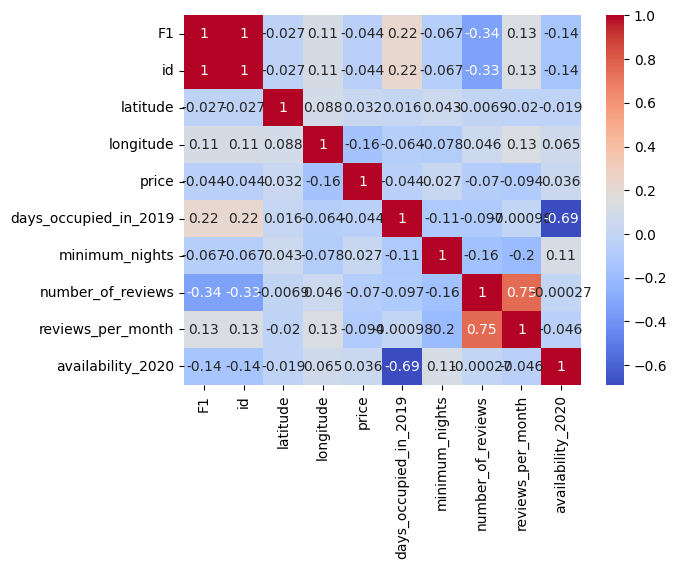

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the data from a CSV file
df = pd.read_csv("NY Realstate Pricing.csv")

# remove any rows with missing values
df.dropna(inplace=True)

# calculate the correlation matrix
corr_matrix = df.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# display the plot
plt.show()

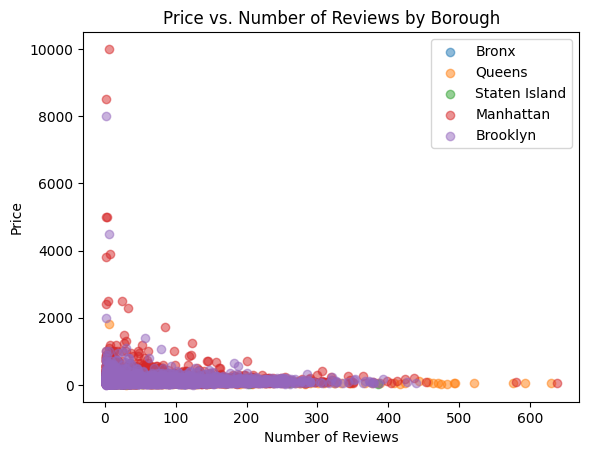

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('NY Realstate Pricing.csv')

# Define the boroughs
boroughs = ['Bronx', 'Queens', 'Staten Island', 'Manhattan', 'Brooklyn']

# Create a scatter plot for each borough
for borough in boroughs:
    # Filter the data for the current borough
    borough_data = data[data['neighbourhood'] == borough]
    
    # Create a scatter plot of price vs. number of reviews
    plt.scatter(borough_data['number_of_reviews'], borough_data['price'], label=borough, alpha=0.5)

# Add labels and a legend to the plot
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs. Number of Reviews by Borough')
plt.legend()

# Show the plot
plt.show()


In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('NY Realstate Pricing.csv')

# Define the features and target variable
features = ['days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'availability_2020']
target = 'price'

# Split the dataset into a training set and a test set
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# Train a linear regression model on the training set
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Define a predict function
def predict(model, data):
    X = data[features]
    y_pred = model.predict(X)
    return y_pred

# Use the predict function to make predictions on the test set
y_pred = predict(model, test_data)

# Evaluate the performance of the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_data[target], y_pred)
r2 = r2_score(test_data[target], y_pred)
print("MSE: ", mse)
print("R2 Score: ", r2)


MSE:  66060.07789805165
R2 Score:  0.003665387135155518


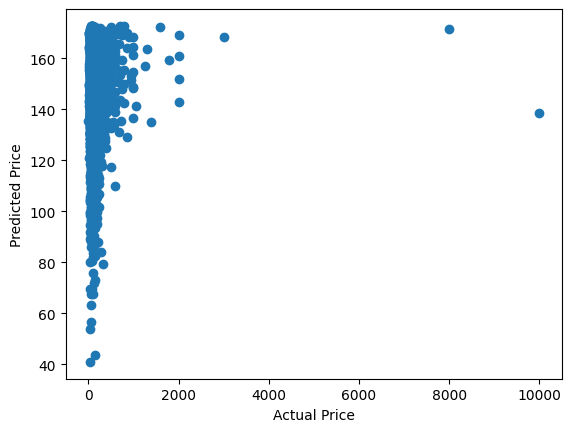

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('NY Realstate Pricing.csv')

# Define the features and target variable
features = ['days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'availability_2020']
target = 'price'

# Split the dataset into a training set and a test set
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# Train a linear regression model on the training set
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Use the predict function to make predictions on the test set
y_pred = model.predict(test_data[features])

# Visualize the predicted values and the actual values
plt.scatter(test_data[target], y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


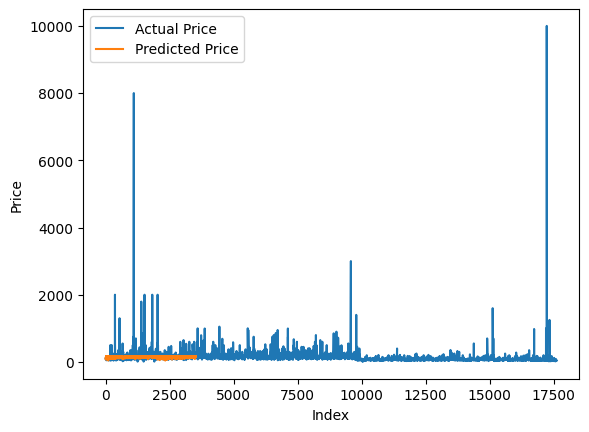

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('NY Realstate Pricing.csv')

# Define the features and target variable
features = ['days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'availability_2020']
target = 'price'

# Split the dataset into a training set and a test set
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# Train a linear regression model on the training set
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Use the predict function to make predictions on the test set
y_pred = model.predict(test_data[features])

# Visualize the predicted values and the actual values
plt.plot(test_data[target], label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_performance(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Example usage:
y_true = test_data[target]
y_pred = predict(model, test_data)
rmse, mae = evaluate_performance(y_true, y_pred)
print("RMSE: ", rmse)
print("MAE: ", mae)


RMSE:  257.0215514272133
MAE:  84.43697859820199


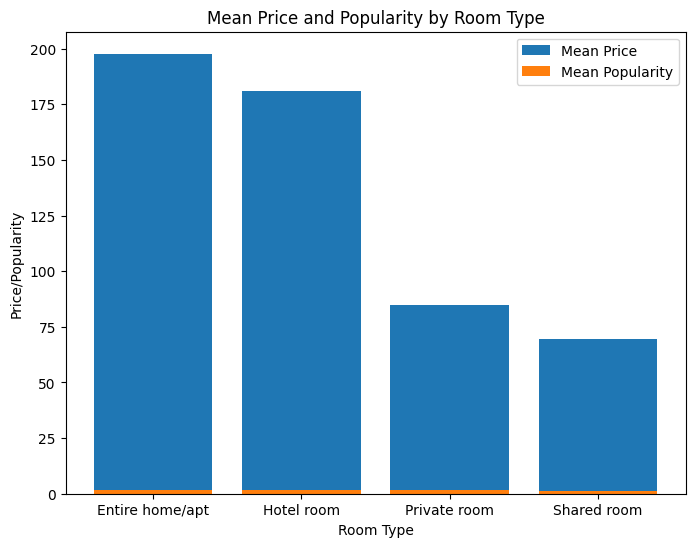

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('NY Realstate Pricing.csv')

# Calculate the mean price and popularity (reviews per month) by room type
room_type_data = data.groupby('room_type').agg({'price': 'mean', 'reviews_per_month': 'mean'})
room_type_data = room_type_data.reset_index()

# Visualize the mean price and popularity by room type using a bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(room_type_data['room_type'], room_type_data['price'], label='Mean Price')
ax.bar(room_type_data['room_type'], room_type_data['reviews_per_month'], label='Mean Popularity')
ax.set_xlabel('Room Type')
ax.set_ylabel('Price/Popularity')
ax.set_title('Mean Price and Popularity by Room Type')
ax.legend()
plt.show()


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('NY Realstate Pricing.csv')

# Define the features and target variable
features = ['days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'availability_2020']
target = 'price'

# Define a function to plot the relationship between availability and price
def plot_availability_vs_price(data):
    sns.scatterplot(x='availability_2020', y='price', data=data)
    plt.title('Availability vs. Price')
    plt.xlabel('Availability')
    plt.ylabel('Price')
    plt.show()

# Define a function to calculate the correlation between availability and price
def calculate_availability_price_correlation(data):
    corr = data['availability_2020'].corr(data['price'])
    return corr

# Define a function to train a linear regression model to predict price based on availability
def train_availability_price_model(data):
    from sklearn.linear_model import LinearRegression
    
    # Split the dataset into a training set and a test set
    train_data = data.sample(frac=0.8, random_state=42)
    test_data = data.drop(train_data.index)

    # Train a linear regression model on the training set
    model = LinearRegression()
    model.fit(train_data[['availability_2020']], train_data[target])

    return model

# Define a function to make predictions using the availability price model
def predict_availability_price(model, data):
    X = data[['availability_2020']]
    y_pred = model.predict(X)
    return y_pred


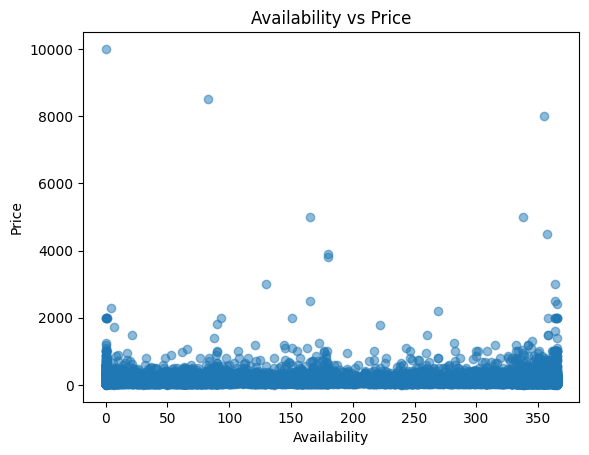

In [45]:
import matplotlib.pyplot as plt

def plot_availability_vs_price(data):
    plt.scatter(data['availability_2020'], data['price'], alpha=0.5)
    plt.title('Availability vs Price')
    plt.xlabel('Availability')
    plt.ylabel('Price')
    plt.show()

plot_availability_vs_price(data)


<Axes: xlabel='availability_2020', ylabel='price'>

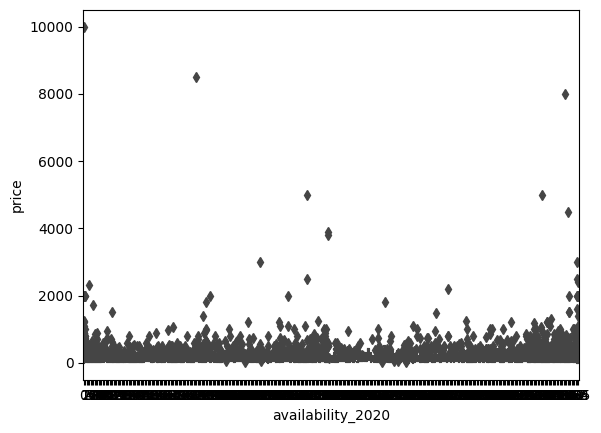

In [46]:
import seaborn as sns

sns.boxplot(x='availability_2020', y='price', data=data)


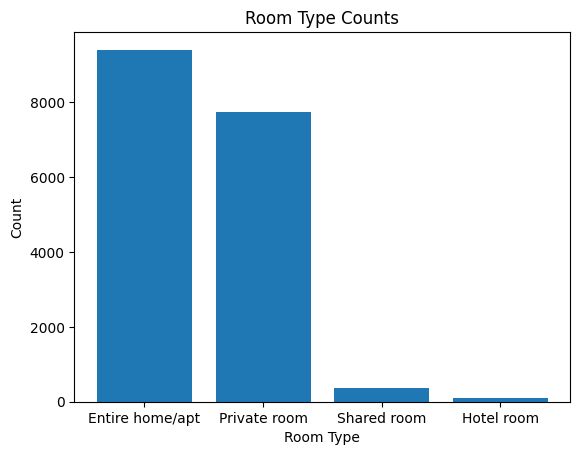

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('NY Realstate Pricing.csv')

# Define a function to count the occurrences of each room type
def count_room_types(data):
    counts = data['room_type'].value_counts()
    return counts

# Define a function to visualize the room type counts
def plot_room_type_counts(counts):
    plt.bar(counts.index, counts.values)
    plt.title('Room Type Counts')
    plt.xlabel('Room Type')
    plt.ylabel('Count')
    plt.show()

# Call the functions to count and visualize the room types
counts = count_room_types(data)
plot_room_type_counts(counts)


Correlation Coefficient:  -0.06997092931911145


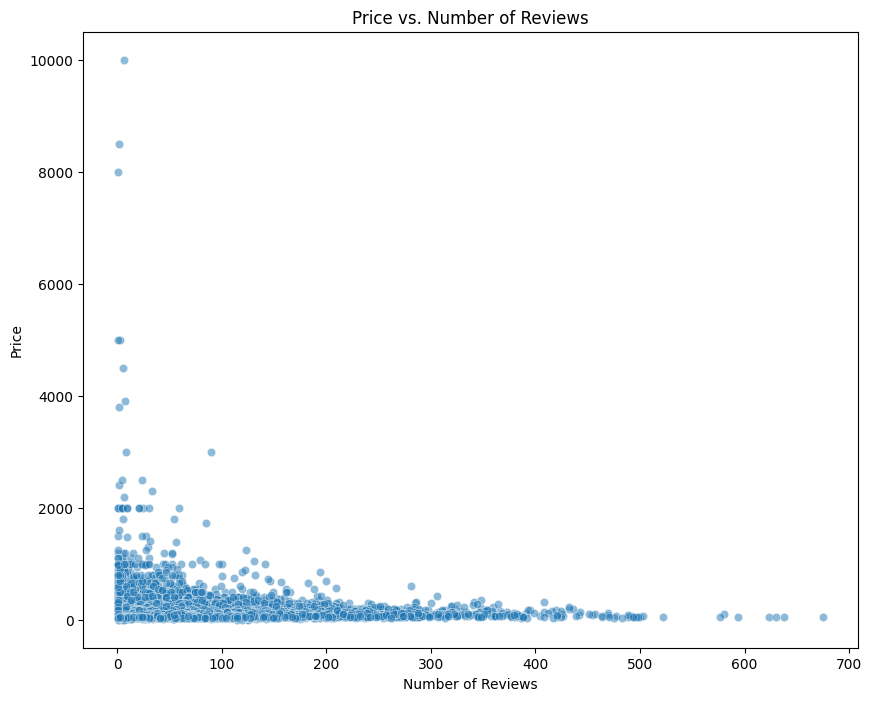

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('NY Realstate Pricing.csv')

# Define a function to plot the scatter plot of price vs. number of reviews
def plot_price_vs_reviews(data):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='number_of_reviews', y='price', data=data, alpha=0.5)
    plt.xlabel('Number of Reviews')
    plt.ylabel('Price')
    plt.title('Price vs. Number of Reviews')

# Define a function to calculate the correlation coefficient between price and number of reviews
def calculate_correlation(data):
    corr_coef = data['number_of_reviews'].corr(data['price'])
    return corr_coef

# Call the functions to plot the scatter plot and calculate the correlation coefficient
plot_price_vs_reviews(data)
corr_coef = calculate_correlation(data)
print("Correlation Coefficient: ", corr_coef)


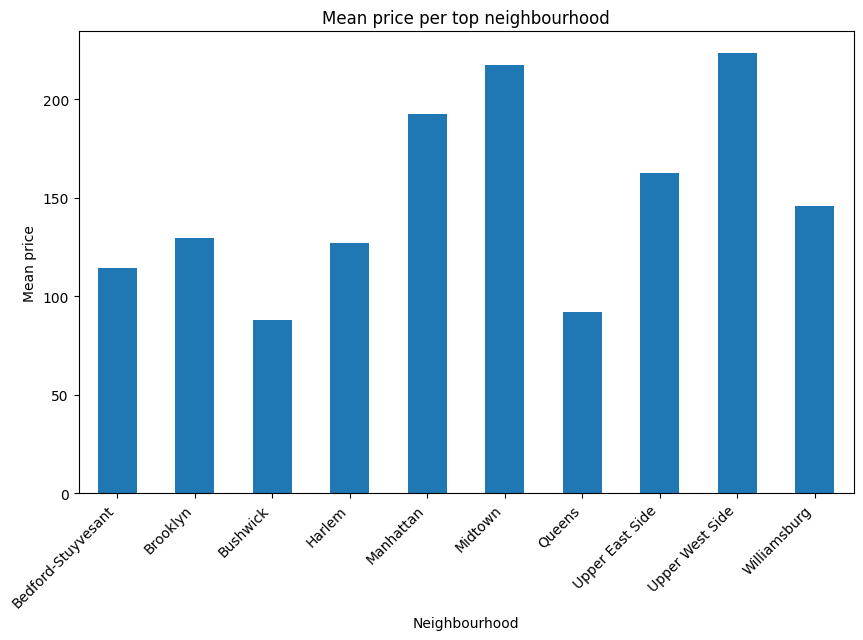

In [49]:
# Select the top 10 neighbourhoods with the highest number of listings
top_neighborhoods = df['neighbourhood'].value_counts().nlargest(10).index

# Calculate the mean price per top neighbourhood
mean_price_top = df[df['neighbourhood'].isin(top_neighborhoods)].groupby('neighbourhood')['price'].mean()

# Plot the mean price per top neighbourhood
mean_price_top.plot(kind='bar', figsize=(10, 6))
plt.title('Mean price per top neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean price')
plt.xticks(rotation=45, ha='right')
plt.show()
